In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns


**Data exploration **

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Breast_Cancer.csv')

In [ ]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [ ]:
data.info()

In [ ]:
%matplotlib inline

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='Tumor Size',y='Status',data=data)

In [ ]:
sns.lmplot(x='Age', y='Status',data=data)

In [ ]:
sns.pairplot(data)

In [ ]:
data.shape

(4024, 16)

In [ ]:
data['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [ ]:
data['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [ ]:
data['T Stage '].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [ ]:
data['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [ ]:
data['6th Stage'].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [ ]:
data['differentiate'].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [ ]:
data['Grade'].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [ ]:
data['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

In [ ]:
data['Estrogen Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
data['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
data['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

**Label encoder**

In [ ]:
from sklearn import preprocessing

In [ ]:
Columns = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status','Progesterone Status','Status']
for l in Columns : 
  le = preprocessing.LabelEncoder()
  le.fit(data[l].unique())

  tab = le.transform(data[l])
  for i in range(tab.shape[0]) : 
    data[l][i] = tab[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for l in Columns : 
  data[l] = data[l].astype(np.int64)

In [ ]:
data.info()

In [ ]:
data['Status'].value_counts()

0    3408
1     616
Name: Status, dtype: int64

In [ ]:
data['Race'].value_counts()

2    3413
1     320
0     291
Name: Race, dtype: int64

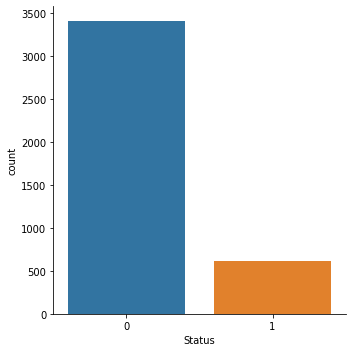

In [ ]:
sns.catplot(data=data, x="Status", kind="count")


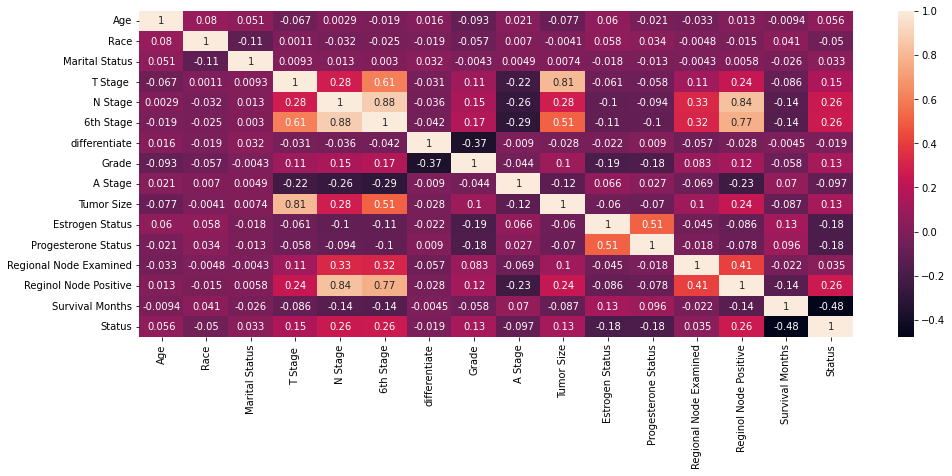

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True)

**Training**

In [ ]:
H = data[['Race', 'Marital Status', 'T Stage ', 'N Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status','Progesterone Status']]

In [ ]:
y= data['Status']

In [ ]:
X = data[['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months']]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X

**Classification models**

**1) Logistic_regression **

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.8894409937888199

*2) Cross_validation*

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(solver = "sag", max_iter=500), X_train, y_train, cv=5, scoring="accuracy").mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.8940636380321282

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
lm = cross_val_score(LogisticRegression(solver = "sag", max_iter=500), X_train, y_train, cv=5, scoring="accuracy").mean()
lk = cross_val_score(KNeighborsClassifier(14), X_train, y_train, cv=5, scoring="accuracy").mean()
print("Logistic regression : ", lm )
print("KNeighborsClassifier : ", lk )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Logistic regression :  0.8940636380321282
KNeighborsClassifier :  0.8931319610134946


*2.1) Shuffle split *

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(4, test_size=0.2)

cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=cv).mean()

0.8850931677018634

*2.2) Group Kfold*

In [ ]:
gkf = GroupKFold(3)
for train, test in gkf.split(X_train, y_train, groups=list(X_train['Race'])):
  print("%s %s" % (train, test))

In [ ]:
from sklearn.model_selection import GroupKFold

cv = GroupKFold(3).split(X_train, y_train, groups=X_train['Race'])
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=cv).mean()

0.8640252664495532

Validation_curve pour trouver la meilleure valeur pour un hyperparamètre donnée

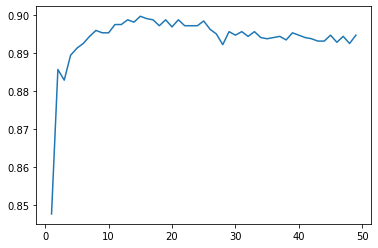

In [ ]:
from sklearn.model_selection import validation_curve

def Best_hyperparameters(model, X_train, y_train,hyperparameter,k, cv) : 
  train_score, val_score = validation_curve(model, X_train, y_train, param_name = hyperparameter, param_range= k, cv=cv)
  return val_score
k = np.arange(1, 50)
model = KNeighborsClassifier()
vf = Best_hyperparameters(model, X_train, y_train,'n_neighbors',k, 5)
plt.plot(k, vf.mean(axis=1))

In [ ]:
max = vf.mean(axis=1).max()
index = list(vf.mean(axis=1)).index(max)
print("la plus grande performance du modèle est ",max," index = ",index)

la plus grande performance du modèle est  0.8996570810351322  index =  14


GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
def GridSearchCV_KNN(X_train, y_train) : 
  param_grid = {"n_neighbors": np.arange(1,20),
                "metric": ['euclidean', 'cosine', 'manhattan' ]}
  model = KNeighborsClassifier()
  grid = GridSearchCV(model, param_grid, cv=5)
  grid.fit(X_train, y_train)
  return grid

In [ ]:
grid = GridSearchCV_KNN(X_train, y_train)

In [ ]:
grid.best_score_

0.8971755068921882

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [ ]:
model = grid.best_estimator_ 

In [ ]:
model.score(X_test, y_test)

0.8782608695652174

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, model.predict(X_test))

array([[666,  17],
       [ 72,  50]])

In [ ]:
param_grid = {"penalty": ['l1', 'l2', 'elasticnet'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ]}

model = LogisticRegression(max_iter=500)
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
grid.best_score_

0.8977942099823227

In [ ]:
lm = cross_val_score(KNeighborsClassifier(15), X_train, y_train, cv=5, scoring="accuracy").mean()


2) SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

sm = SMOTE(k_neighbors=5)
print('Original dataset shape %s' % Counter(y))
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 3408, 1: 616})
Resampled dataset shape Counter({0: 3408, 1: 3408})


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
grid = GridSearchCV_KNN(X_train, y_train)
n = grid.best_params_['n_neighbors']
lk = cross_val_score(KNeighborsClassifier(n), X_train, y_train, cv=5, scoring="accuracy")
grid.best_score_
lk.mean()


0.8971755068921882

In [ ]:
grid.best_score_


0.8971755068921882